# Text Classification

## Import Libraries

In [1]:
from sklearn.datasets import fetch_20newsgroups
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB

In [2]:
#I have fetched the data through sklearn itself just to reduce the amount of unnecessary work
news_group=fetch_20newsgroups()
#these are the stopwords which we don't want to include in out vocabulary.
stop=set(stopwords.words('english'))
#punctuation marks also should be removed from our vocabulary.
punctuations=list(string.punctuation) 
stop.update(punctuations) #now we have all the unnecessary words and punctuation marks in our set "stops"
news_group.keys()  #what keys do we have in our data.

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [3]:
# add more stop words
more_stops=np.loadtxt('stopx.txt',dtype=str,delimiter=" ")
stop.update(more_stops)

In [4]:
len(stop) #length of stop words

843

In [5]:
len(news_group.data) #length of Documents

11314

In [6]:
all_document=news_group.data #all_documents contains all the "X" data in un-tokenized form.
all_categories=news_group.target #all_cateories contain all the "Y" data.
all_document_modified=[word_tokenize(doc) for doc in all_document] #tokenized data for each document

In [7]:
#splitting these documents in train and test data.
x_train,x_test,y_train,y_test=train_test_split(all_document_modified,all_categories,random_state=1)

In [8]:
all_words = [] #this variable is going to contain all the words from all our tokenized documents.
for doc in x_train:
    for word in doc:
        word = word.lower()  # normalize to lowercase
        if (
            word not in stop and  # ignore stopwords
            len(word) > 2 and     #ignore very short words (e.g., "is", "to")
            word.isalpha()        # ensure word contains only letters (no numbers/punctuation)
        ):
            all_words.append(word)

In [9]:
len(all_words) #length of words

1066738

In [10]:
#frequency of all_words
def freq_dict(all_words):
    dic=dict()
    for word in all_words:
        dic[word] = dic.get(word, 0) + 1 #safely gets the value of key if it exists; otherwise, it returns default. 
    return dic
dic=freq_dict(all_words)

In [11]:
freq=np.array(list(dic.values()))
words=np.array(list(dic.keys()))

# Sort by frequency (descending)
sorted_indices = np.argsort(freq)[::-1]
freq = freq[sorted_indices]
words = words[sorted_indices]

In [12]:
# Extract top features (skip very common 20 words)
features = words[20:10000]  # Adjust range to your needs

# Print some example frequencies
print("Freq of 21st most common word:", freq[20])
print("Freq of 10000th word (if exists):", freq[9999] if len(freq) > 9999 else "Not enough words")

Freq of 21st most common word: 2063
Freq of 10000th word (if exists): 13


# Frequecy Distribution of words

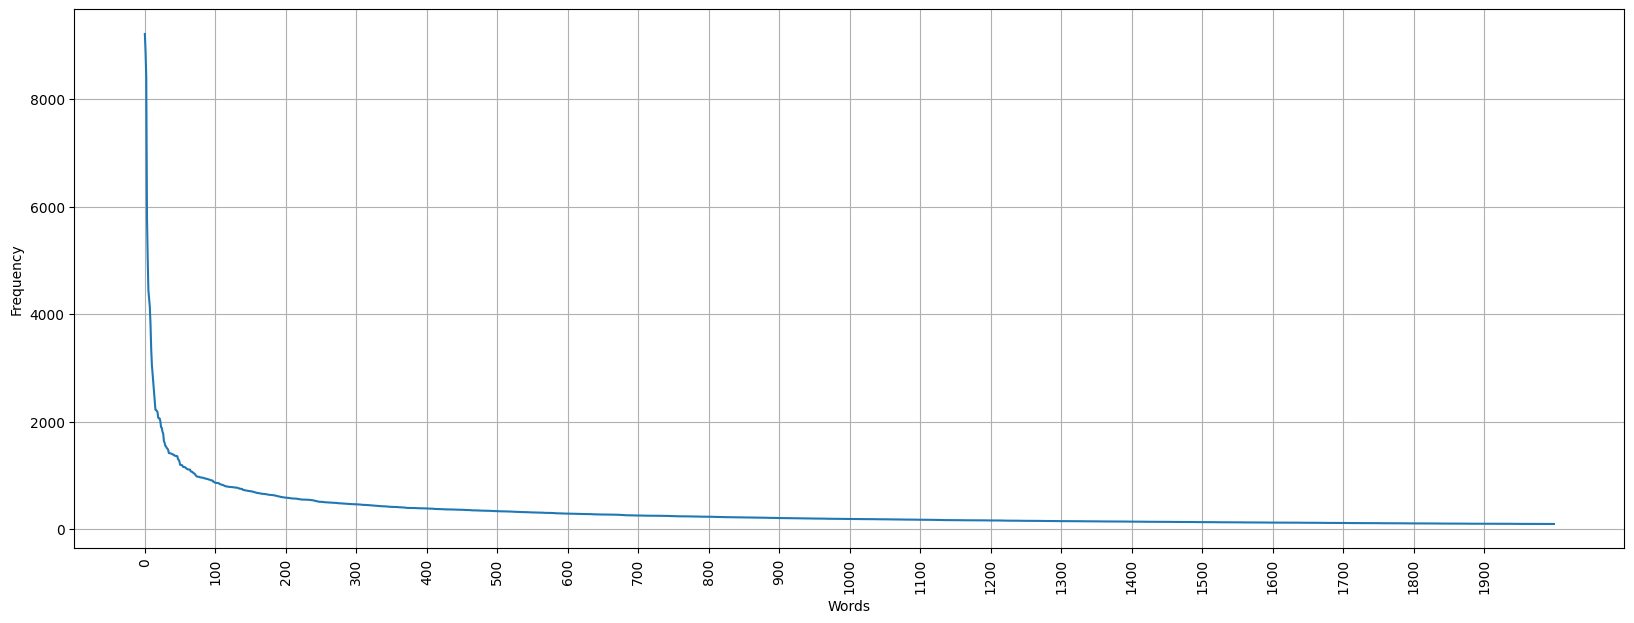

In [13]:
import matplotlib.pyplot as plt
lower_limit=0
upper_limit=2000
difference_between_each_xtick=50
plt.figure(figsize=(20,7))
plt.plot(np.arange(len(freq))[lower_limit:upper_limit],freq[lower_limit:upper_limit])

plt.xlabel('Words')
plt.ylabel('Frequency')

plt.xticks(np.arange(lower_limit,upper_limit,100),rotation=90)
plt.grid()
plt.show()

In [14]:
# This function is the backbone of our Text Classification.
# It takes the patameters x_train or x_test and the list of all features and converts it into a TEXT-CLASSIFICATION-FRIENDLY structure.
# By text-classification-friendly, I mean it converts the data into a 2-D array which contains the frequency of that feature
# in that perticular document. where rows are the documents and columns are the features.
def data_modifier(x_data, features):
    modified_data=np.zeros((len(x_data), len(features)))
    #modified_data currently have a ZEROS numpy array whose shape is (len(x_data), len(features))
    count=0
    #Ignore this "Count" variable. i have created it just to keep an eye on the progress of our algorithm.
    max_count=len(x_data)
    for i in range(len(x_data)):
        #looping over each and every row in the x_data
        current_doc=x_data[i]
        #current_doc contains the current document on which we are iterating.(As the name suggests obviously)
        d=dict()
        #this dictionary contains the frequency of all the elements in our current_doc.
        for word in current_doc:
            if word in d.keys():
                d[word]+=1
            else:
                d[word]=1
        #dictionary created
        for j in range(len(features)):
            #now for each feature in features we will insert the value of the dictionary for the corresponding. that is, 
            #the frequency of each feature in that current document.
            if features[j] in d.keys():
                modified_data[i][j]=d[features[j]]
            else:
                #if the current feature is not in the dictionary, it will remain 0 in the modified_data 2D matrix
                continue
        count+=1
        print("progress: ", (count*100)/max_count, "%")
        #This statement just prints the progress of our data_modifier function.
    #finally I have returned the modified array.
    return modified_data 
#this function takes some time to process because i have considered nearly 3000 features and apart from that we have so many
#documents which contains so many words. so the algorithm has to go through each word in features list for each word in a perticular
#document. and this needs to be done because I think there is probably no other way to create such a modified array from x_data.

In [15]:
x_train_modified = data_modifier(x_train, features)
x_test_modified = data_modifier(x_test, features)


progress:  0.011785503830288745 %
progress:  0.02357100766057749 %
progress:  0.03535651149086624 %
progress:  0.04714201532115498 %
progress:  0.05892751915144372 %
progress:  0.07071302298173247 %
progress:  0.08249852681202122 %
progress:  0.09428403064230996 %
progress:  0.1060695344725987 %
progress:  0.11785503830288745 %
progress:  0.1296405421331762 %
progress:  0.14142604596346495 %
progress:  0.15321154979375368 %
progress:  0.16499705362404243 %
progress:  0.17678255745433116 %
progress:  0.18856806128461992 %
progress:  0.20035356511490865 %
progress:  0.2121390689451974 %
progress:  0.22392457277548616 %
progress:  0.2357100766057749 %
progress:  0.24749558043606365 %
progress:  0.2592810842663524 %
progress:  0.27106658809664114 %
progress:  0.2828520919269299 %
progress:  0.2946375957572186 %
progress:  0.30642309958750735 %
progress:  0.3182086034177961 %
progress:  0.32999410724808487 %
progress:  0.3417796110783736 %
progress:  0.3535651149086623 %
progress:  0.365350

## Using Inbuilt Multinomial Naive Bayes Classifier

In [16]:
clf=MultinomialNB()
clf.fit(x_train_modified,y_train)
clf.score(x_test_modified,y_test)

0.7843761046306115

In [17]:
#fit function takes the training data and gives you a dictionary whose keys are the different classes available to classify.
# and for each key, value is another dictionary, whose keys are all the features available to us and value corresponding
# to each key is sum of all the row of training data corresponding to the current class.(the original key or (say) primary key)
def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        #these are all the documents we need to work upon corresponding to the class i.
        count[i]=dict()
        #count is a dictionary whose each key is yet another dictionary.
        count[i]['total']=0
        #it will maintain the total number of words in class i.
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            #it gives me-"how many times jth feature is coming corresponding to class i"
            count[i]['total']+=count[i][features[j]]
            #this additional key named "total" stores the sum of all the values of ith key which signifies the total number of
            # words in class i.
    #returning the dictionary at last.
    return count

#this "probability" function is another backbone of our naive bayes classifier.But before this function please ckeck out 
#predict function given below.
#This "Probability" function takes takes the dictionary, which was originally returned by fit function, the current data point and the current class as its params.
def probability(dictionary, x, current_class):
    probas_for_each_word=[]
    #my plan, here, is to store all the probabilities for each word in features which is available in the current document
    # and then return the logarithmic sum of all these probabilities for that perticular document.
    for i in range(len(x)):
        #iterating through each feature.
        if x[i]!=0:
            #I am skipping those features whose value corresponding to the current document is 0, that is, they are not present
            # in the that document.
            numerator=dictionary[current_class][features[i]]
            #it denotes that how many times that ith feature is occuring in "current_class"
            #this is the numerator of our NON LOGARITHMIC PROBABILITY
            denominator=dictionary[current_class]['total']
            #it denotes that what is the total number of words in the current class.
            #this is the denominator of our NON LOGARITHMIC PROBABILITY
            proba=np.log((numerator+1)/(denominator+len(x)))
            #i have created a variable "proba" which stores the logarithmic probability which also includes the laplace crrection.
            #here "1" with the numerator and len(x) with denominator denotes the laplace correction.
            probas_for_each_word.append(proba)
            #finally i appended "proba" to the probas_for_each_word array.
    #returning the logarithmic sum of all the probabilities. (which can be treated as multiplication of all the probabilities,
    #but multiplying the probabilities simply won't be a good practice as it may nullify the extreamily small probabilities)
    return sum(probas_for_each_word)

#The predict_single function takes a perticular data point "x" from "predict" function and a dictionary which was obtained
#originally from fit function. Before going through this function, you may like to check out the "predict" function.
def predict_single(dic, x):
    classes = dictionary.keys()
    #this variable "classes" maintains all the possible different classes available to us.
    best_p = -1000
    best_class = -1
    #initiated best_p and best_class variables with negative values because we want to consider maximum valued probabilities at
    #the end. In the first run itself they will be replaced by positive values. "best_p" variable denotes the best probability
    #uptill now. and as the name suggests, best_class denotes the best possible class uptill now.
    first_run = True
    #this boolean variable is taken keeping initial negative values in mind
    for current_class in classes:
        #iterating through each and every class in all possible classes.
        p_current_class = probability(dic, x, current_class)
        #p_current_class denotes the probability of current class.
        if (first_run or p_current_class > best_p):
            #if the probability of current class is better than the best probability then i will update the best probability and
            # best_class to probability of current class and the current class respectively.
            best_p = p_current_class
            best_class = current_class
            #updated
        first_run = False
    #returning the best predicted class for the current data point
    return best_class

#The predict function takes testing data and a dictionary as its input, where the dictionary is the one returned from fit function.
def predict(x_test, dic):
    y_pred=[]
    #y_pred maintains all the predicted classes for provided testing data(In modified format---> see the "data_modifier" function).
    for doc in x_test:
        #iterating each document in testing data.
        y_pred.append(predict_single(dic, doc))
        #for each testing data point, we will append the value of predicted class to y_pred. and we will get that value from
        #predict_single function
    #returning the predicted data finally
    return y_pred

In [18]:
dictionary=fit(x_train_modified, y_train)
#calling the fit function for the modified data.

In [19]:
y_predicted=predict(x_test_modified, dictionary)
#storing the predicted values.

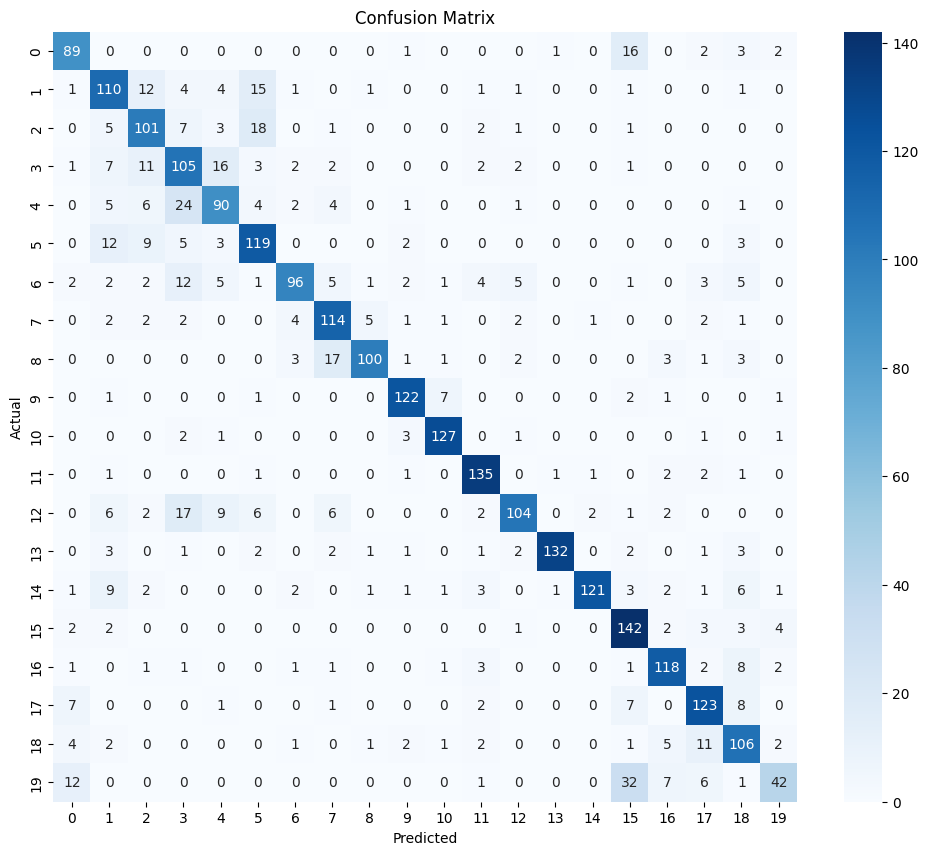

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#printing the confusion matrix for our own naive bayes classifier.
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [21]:
from sklearn.metrics import classification_report
#printing the classification report for our own naive bayes classifier.
print(classification_report(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       114
           1       0.66      0.72      0.69       152
           2       0.68      0.73      0.70       139
           3       0.58      0.69      0.63       152
           4       0.68      0.65      0.67       138
           5       0.70      0.78      0.74       153
           6       0.86      0.65      0.74       147
           7       0.75      0.83      0.79       137
           8       0.91      0.76      0.83       131
           9       0.88      0.90      0.89       135
          10       0.91      0.93      0.92       136
          11       0.85      0.93      0.89       145
          12       0.85      0.66      0.75       157
          13       0.98      0.87      0.92       151
          14       0.97      0.78      0.86       155
          15       0.67      0.89      0.77       159
          16       0.83      0.84      0.84       140
          17       0.78    

# Conclusion

Both built-in and manual implementations of Multinomial Naive Bayes achieved the same accuracy of 0.784, validating the correctness of the manual approach.
This demonstrates a solid understanding of the Naive Bayes algorithm and feature engineering in text classification.